#### Simple Linear Regression using Scikit Learn Library 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [7]:
df = pd.read_csv('placement.csv')

In [11]:
df = df.drop(columns=['Unnamed: 2'])

In [12]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


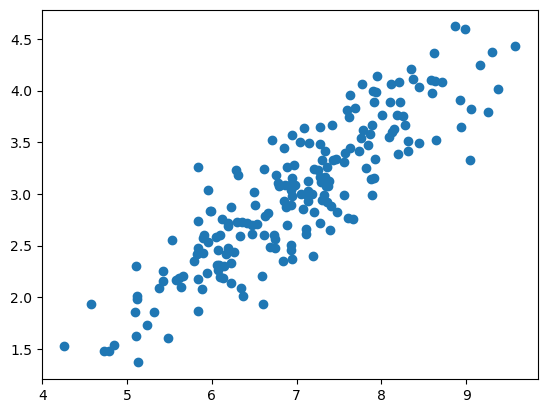

In [14]:
plt.scatter(df['cgpa'],df['package'])
plt.show()

Applying the model using Scikit Learn 

In [104]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

E:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [58]:
beta1 = lr.coef_

In [59]:
beta0 = lr.intercept_

In [69]:
print('beta0 :',beta0)
print('beta1 :',beta1[0])

beta0 : -0.8961119222429144
beta1 : 0.557951973425072


In [62]:
y_pred = beta0 + (beta1)*x_test 

In [79]:
y_test = pd.DataFrame(y_test)

In [91]:
print('predictions:')
pd.concat([y_test,y_pred],axis=1)

predictions:


,package,cgpa
112,4.10,3.891116
29,3.49,3.093245
182,2.08,2.384646
199,2.33,2.574349
193,1.94,1.653729
85,1.48,1.776478
10,1.86,2.072193
54,3.09,2.931439
115,4.21,3.762787
35,2.87,2.937018


#### Creating Class for Simple Linear Regression

In [171]:
class SLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,x_train,y_train):
        num = 0 
        den = 0
        
        for i in range(x_train.shape[0]):
            num = num + ((x_train[i] - x_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((x_train[i] - x_train.mean())*(x_train[i] - x_train.mean()))
            
        self.m = num/den 
        self.b = y_train.mean() - (self.m*x_train.mean())
        print('coefficient: ',self.m)
        print('intercept: ',self.b)
        
    def predict(self,x_test):
        y_pred = self.m*x_test + self.b
        print(y_pred)

In [172]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [173]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [175]:
lr1 = SLR()

In [176]:
lr1.fit(X_train,y_train)

coefficient:  0.5579519734250721
intercept:  -0.8961119222429152


In [177]:
lr1.predict(X_test)

[3.89111601 3.09324469 2.38464568 2.57434935 1.6537286  1.77647803
 2.07219258 2.93143862 3.76278706 2.93701814 4.09197872 3.51170867
 2.97049525 2.40138424 3.18809652 3.46707251 1.94386362 3.24389172
 2.97607477 3.41685683 2.55761079 3.16577844 2.85890486 3.12114229
 3.68467378 2.8700639  3.49497011 3.34432308 3.91901361 1.96060218
 3.65119666 3.2104146  3.74046898 2.7863711  2.78079158 3.27178932
 3.52844723 2.61340599 2.65804215 2.71383735]
